### QLD Votes 2020

looking at the swings that happened last election

In [762]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import pickle
import collections

In [763]:
### import the position codes for our hextiles graph
hex2020 = pd.read_csv('Q2020hextiles.csv')

In [764]:
# some seats have changed name prior to 2017
# note that hill and macalister are not officially replacements for dalrymple and albert, but there is a lot of overlap
namechanges = {'cooper':'ashgrove', 'scenic rim': 'beaudesert','mcconnel': 'brisbane central','oodgeroo': 'cleveland',\
               'maiwar': 'indooroopilly', 'kurwongbah': 'kallangur','traeger': 'mount isa', 'toohey': 'sunnybank',\
               'miller': 'yeerongpilly', 'hill':'dalrymple', 'macalister': 'albert',}

namechangesrev = {v : k for k, v in namechanges.items()}

abolished = ['mount coot-tha']

newseats = ['bancroft', 'bonney', 'jordan', 'ninderry', 'theodore']

In [765]:
# a function to extract the relevant data fromeach election and transformit 

def electionSwingPrepper(year):
    yeardf = pd.read_pickle(f"./{year}_2PP_seats.pkl")
    yeardf = yeardf[['Seat','winning party', 'winning pc']]
    yeardf.rename(columns={'Seat': 'Seat', 'winning party': f'winning party {year}', 'winning pc': f'winning pc {year}'}, inplace=True)
    
    # replace NLP and LIB as LNP, blanks as IND
    yeardf[f'winning party {year}'] = yeardf[f'winning party {year}'].replace(['NPA','LIB'], "LNP")
    yeardf[f'winning party {year}'] = yeardf[f'winning party {year}'].replace('', 'IND')

    
    yeardf[f'winning pc {year}'] = pd.to_numeric(yeardf[f'winning pc {year}'], errors='coerce')
    
    
    # set the color 
    yeardf[f'color{year}'] = 'white'       # for blanks
    
    def colorPlotter(party,param1, param2, param3, c1, c2, c3):
    
        yeardf[f'color{year}'] = np.where((yeardf[f'winning pc {year}'] > param1) & (yeardf[f'winning pc {year}'] <= param2) & (yeardf[f'winning party {year}'] == party), c1, yeardf[f'color{year}'])
        yeardf[f'color{year}'] = np.where((yeardf[f'winning pc {year}'] > param2) & (yeardf[f'winning pc {year}'] <= param3) & (yeardf[f'winning party {year}'] == party), c2, yeardf[f'color{year}'])
        yeardf[f'color{year}'] = np.where((yeardf[f'winning pc {year}'] > param3) & (yeardf[f'winning pc {year}'] <= 100) & (yeardf[f'winning party {year}'] == party), c3, yeardf[f'color{year}'])
        
    colorPlotter("ALP",50,55,60,"salmon", "tomato", "darkred")
    colorPlotter("LNP",50,55,60,"deepskyblue", "blue", "navy")
    colorPlotter("GRN",50,55,60,"springgreen", "springgreen", "springgreen")
    colorPlotter("KAP",50,55,60,"khaki", "khaki", "khaki")
    colorPlotter("ONP",50,55,60,"orange", "orange", "orange")
    colorPlotter("IND",50,55,60,"dimgrey", "dimgrey", "dimgrey")    

    # rename seats that need it
    yeardf.Seat = yeardf.Seat.replace(namechangesrev) 

    return yeardf

## 2017

In [771]:
year = '2017'

yeardf = electionSwingPrepper(year)

yeardf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017
0,algester,ALP,64.43,darkred
1,aspley,ALP,51.17,salmon
2,bancroft,ALP,56.21,tomato


In [772]:
swingdf = yeardf.merge(hex2020, how="left")

swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y
0,algester,ALP,64.43,darkred,18.5,2.2
1,aspley,ALP,51.17,salmon,18.5,3.4
2,bancroft,ALP,56.21,tomato,17.0,3.7


([], <a list of 0 Text major ticklabel objects>)

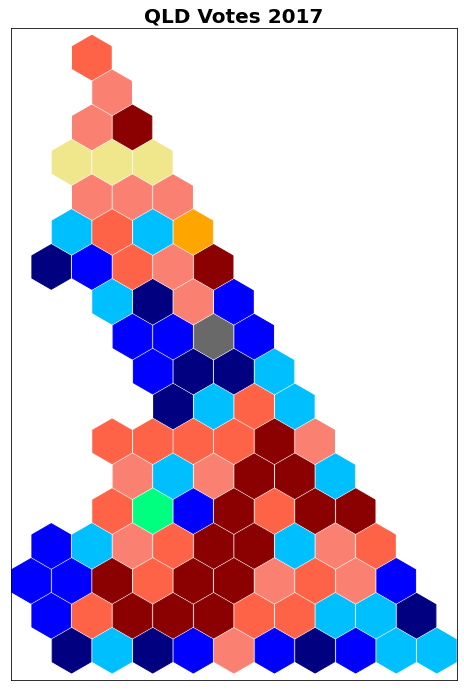

In [773]:
# map maker 

fig, ax = plt.subplots()
plt.title(f'QLD Votes 2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf[f'color{year}'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

Key:
* Red = ALP (dark = safe, light = marginal)
* Blue = LNP (dark = safe, light = marginal)
* Orange = ONP
* Khaki = KAP
* Green = Green

Note: abolished seats generally don't appear. In rare cases where there is significant overlap with a new seat they may be considered to be an extension of that seat (eg Tablelands does not show up as it was split evenly between three seats, but the new seat of hill includes voting from the older seat it had heavy overlap with)

# 2015 - 2017

In [774]:
year = '2015'

yeardf = electionSwingPrepper(year)

yeardf.head(3)

,Seat,winning party 2015,winning pc 2015,color2015
0,macalister,LNP,51.67,deepskyblue
1,algester,ALP,56.99,tomato
2,cooper,ALP,54.25,salmon


In [775]:
swingdf = swingdf.merge(yeardf, how="left")

swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new

swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

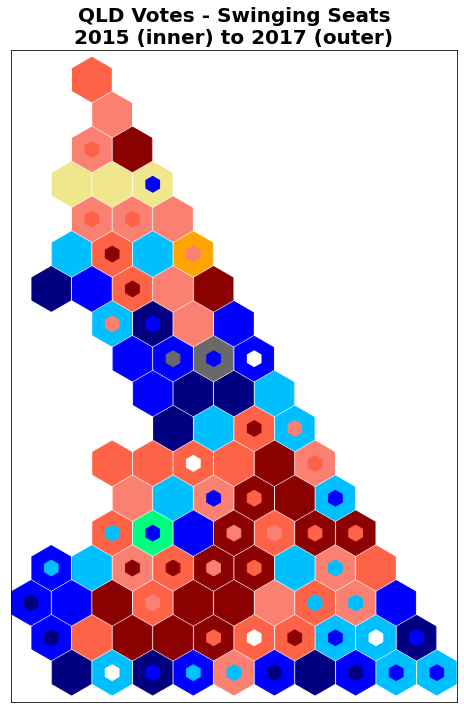

In [776]:
fig, ax = plt.subplots()
plt.title('QLD Votes - Swinging Seats\n2015 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2015'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

### 2012 - 2017

In [777]:
year = '2012'

yeardf = electionSwingPrepper(year)

yeardf.head(3)

,Seat,winning party 2012,winning pc 2012,color2012
0,macalister,LNP,61.89,navy
1,algester,LNP,59.15,blue
2,cooper,LNP,55.70,blue


In [778]:
swingdf = swingdf.merge(yeardf, how="left")

swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new

swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,winning pc 2012,color2012
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato,LNP,59.15,blue
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue,LNP,71.75,navy
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

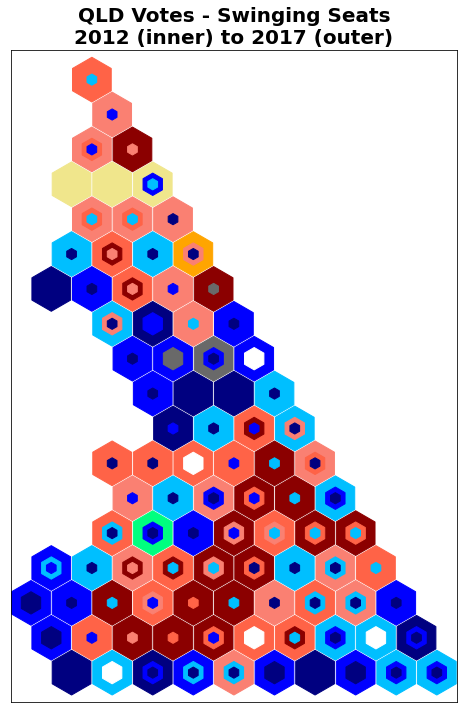

In [779]:
fig, ax = plt.subplots()
plt.title('QLD Votes - Swinging Seats\n2012 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=125, c=swingdf['color2012'])


plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## 2009 - 2017

In [780]:
year = '2009'
yeardf = electionSwingPrepper(year)
yeardf.head(3)

,Seat,winning party 2009,winning pc 2009,color2009
0,macalister,ALP,56.47,tomato
1,algester,ALP,59.21,tomato
2,cooper,ALP,57.10,tomato


In [781]:
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new
swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,winning pc 2012,color2012,winning party 2009,winning pc 2009,color2009
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato,LNP,59.15,blue,ALP,59.21,tomato
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue,LNP,71.75,navy,LNP,54.46,deepskyblue
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

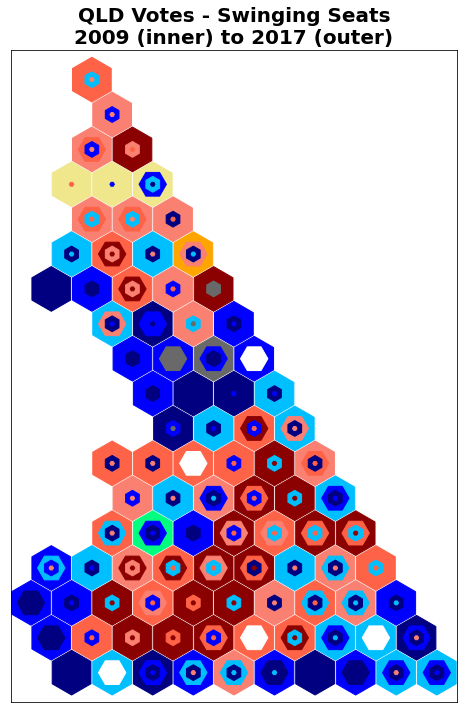

In [782]:
fig, ax = plt.subplots()
plt.title('QLD Votes - Swinging Seats\n2009 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=750, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=20, c=swingdf['color2009'])


plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## 2006 - 2017

In [783]:
year = '2006'
yeardf = electionSwingPrepper(year)
yeardf.head(65)

,Seat,winning party 2006,winning pc 2006,color2006
0,macalister,ALP,67.01,darkred
1,algester,ALP,67.84,darkred
2,cooper,ALP,58.08,tomato
3,aspley,ALP,54.61,salmon
4,barron river,ALP,55.14,tomato
...,...,...,...,...
60,mundingburra,ALP,60.54,darkred
61,murrumba,ALP,61.58,darkred
62,nanango,IND,54.24,dimgrey
63,nicklin,IND,75.08,dimgrey


In [784]:
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new
swingdf.head(69)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,winning pc 2012,color2012,winning party 2009,winning pc 2009,color2009,winning party 2006,winning pc 2006,color2006
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato,LNP,59.15,blue,ALP,59.21,tomato,ALP,67.84,darkred
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue,LNP,71.75,navy,LNP,54.46,deepskyblue,ALP,54.61,salmon
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white
3,barron river,ALP,51.86,salmon,11.0,6.7,ALP,53.12,salmon,LNP,59.48,blue,ALP,52.32,salmon,ALP,55.14,tomato
4,bonney,LNP,51.69,deepskyblue,11.0,1.9,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,nicklin,LNP,55.28,blue,15.5,4.6,IND,64.89,dimgrey,IND,54.88,dimgrey,IND,66.31,dimgrey,IND,75.08,dimgrey
65,ninderry,LNP,58.38,blue,21.5,4.6,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white
66,noosa,IND,61.53,dimgrey,18.5,4.6,LNP,58.62,blue,LNP,75.46,navy,LNP,69.85,navy,LNP,56.32,blue
67,nudgee,ALP,64.32,darkred,24.5,3.4,ALP,61.25,darkred,LNP,53.11,deepskyblue,ALP,64.26,darkred,ALP,68.34,darkred


([], <a list of 0 Text major ticklabel objects>)

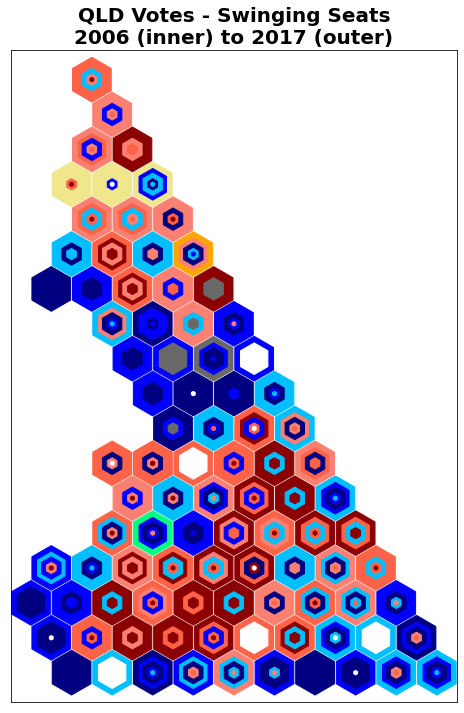

In [785]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=125, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=20, c=swingdf['color2006'])



plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

### 2004 -2007

In [786]:
year = '2004'
yeardf = electionSwingPrepper(year)
yeardf.head(3)

,Seat,winning party 2004,winning pc 2004,color2004
0,macalister,ALP,67.27,darkred
1,algester,ALP,67.97,darkred
2,cooper,ALP,64.69,darkred


In [787]:
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new
swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,...,color2012,winning party 2009,winning pc 2009,color2009,winning party 2006,winning pc 2006,color2006,winning party 2004,winning pc 2004,color2004
0,algester,ALP,64.43,darkred,18.5,2.2,ALP,56.99,tomato,LNP,...,blue,ALP,59.21,tomato,ALP,67.84,darkred,ALP,67.97,darkred
1,aspley,ALP,51.17,salmon,18.5,3.4,LNP,55.17,blue,LNP,...,navy,LNP,54.46,deepskyblue,ALP,54.61,salmon,ALP,54.32,salmon
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white,NaN,...,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

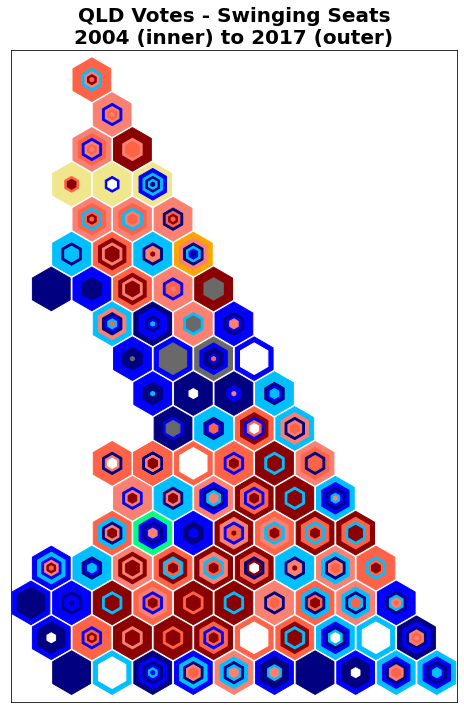

In [788]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1900, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=100, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=20, c=swingdf['color2004'])




plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

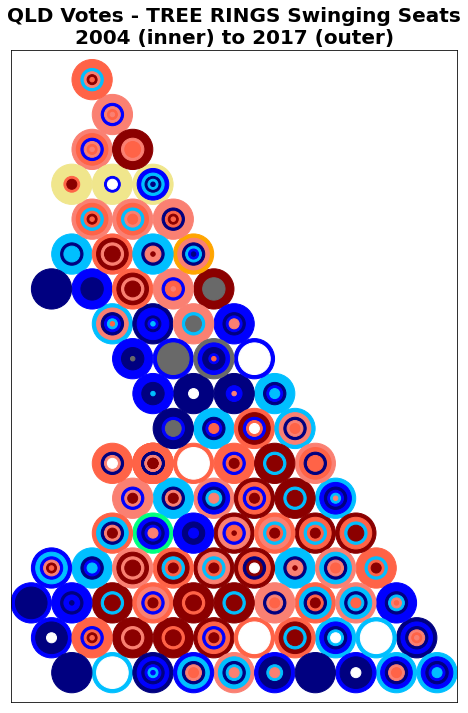

In [789]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - TREE RINGS Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=1620, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=100, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=20, c=swingdf['color2004'])


plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

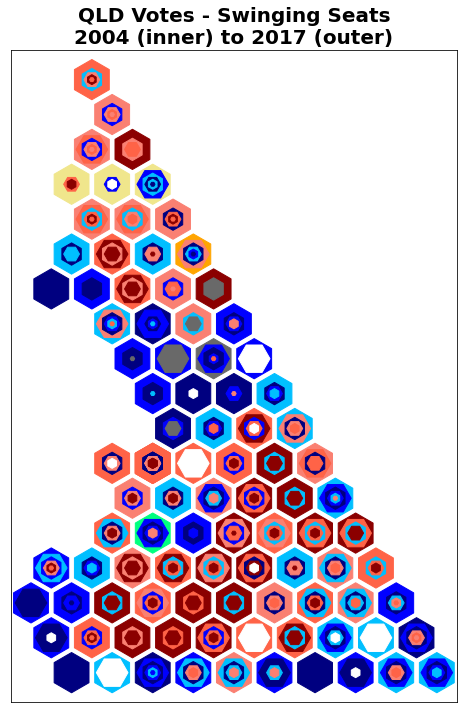

In [790]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1620, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=100, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=20, c=swingdf['color2004'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

In [803]:
# a version where the size of the win is not considered, just the party

def colorUpdater(year):
    swingdf[f'color{year}'] = np.where(swingdf[f'color{year}'] == 'salmon', 'tomato', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'color{year}'] == 'darkred', 'tomato', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'color{year}'] == 'navy', 'blue', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'color{year}'] == 'deepskyblue', 'blue', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'color{year}'] == 'lightsteelblue', 'blue', swingdf[f'color{year}'])
    
colorUpdater('2017')
colorUpdater('2015')
colorUpdater('2012')
colorUpdater('2009')
colorUpdater('2006')
colorUpdater('2004')

swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,...,color2012,winning party 2009,winning pc 2009,color2009,winning party 2006,winning pc 2006,color2006,winning party 2004,winning pc 2004,color2004
0,algester,ALP,64.43,tomato,18.5,2.2,ALP,56.99,tomato,LNP,...,blue,ALP,59.21,tomato,ALP,67.84,tomato,ALP,67.97,tomato
1,aspley,ALP,51.17,tomato,18.5,3.4,LNP,55.17,blue,LNP,...,blue,LNP,54.46,blue,ALP,54.61,tomato,ALP,54.32,tomato
2,bancroft,ALP,56.21,tomato,17.0,3.7,NaN,NaN,white,NaN,...,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

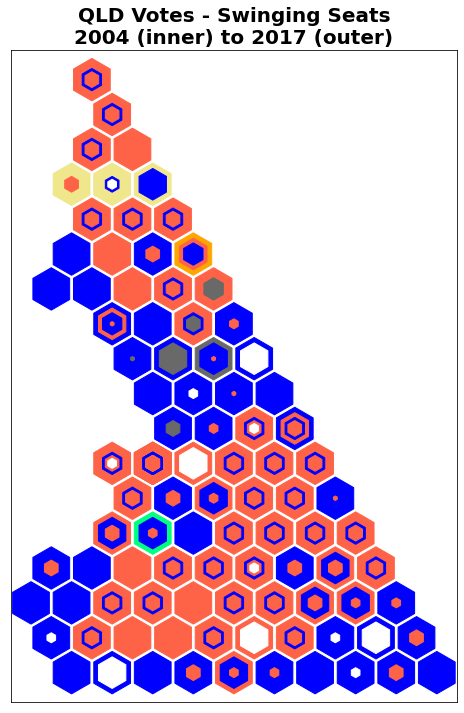

In [804]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1800, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=100, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=20, c=swingdf['color2004'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

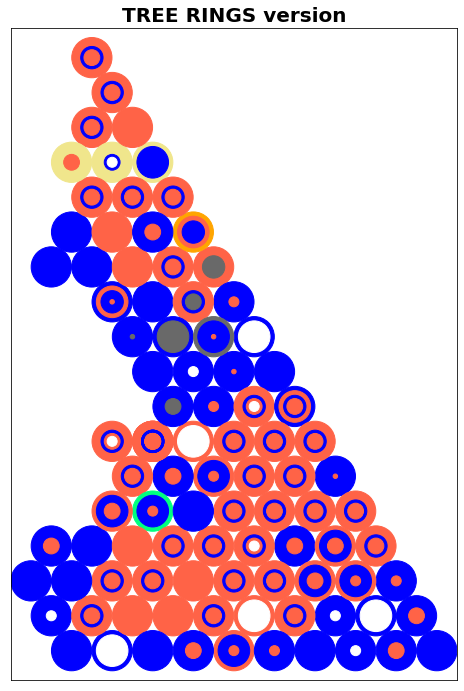

In [805]:
fig, ax = plt.subplots()
plt.title(f'TREE RINGS version', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=1620, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=100, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=20, c=swingdf['color2004'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

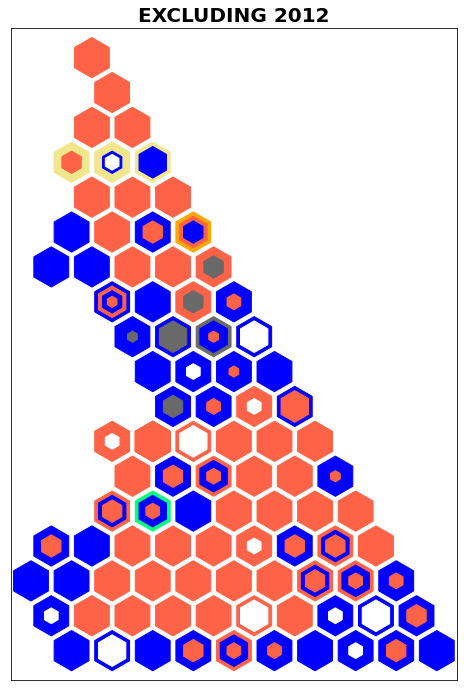

In [806]:
# excluding 2012 - which seems like an anomaly

fig, ax = plt.subplots()
plt.title(f'EXCLUDING 2012', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1620, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])

#ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=125, c=swingdf['color2004'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## LABOR'S WINNINGEST SEATS

In [807]:
swingdf.head(2)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,winning party 2012,...,color2012,winning party 2009,winning pc 2009,color2009,winning party 2006,winning pc 2006,color2006,winning party 2004,winning pc 2004,color2004
0,algester,ALP,64.43,tomato,18.5,2.2,ALP,56.99,tomato,LNP,...,blue,ALP,59.21,tomato,ALP,67.84,tomato,ALP,67.97,tomato
1,aspley,ALP,51.17,tomato,18.5,3.4,LNP,55.17,blue,LNP,...,blue,LNP,54.46,blue,ALP,54.61,tomato,ALP,54.32,tomato


In [808]:
freqdf = swingdf[['Seat','winning party 2017','winning party 2015','winning party 2012','winning party 2009','winning party 2006','winning party 2004']]

freqdf.head(2)

,Seat,winning party 2017,winning party 2015,winning party 2012,winning party 2009,winning party 2006,winning party 2004
0,algester,ALP,ALP,LNP,ALP,ALP,ALP
1,aspley,ALP,LNP,LNP,LNP,ALP,ALP


In [809]:

# find out how many times each party has held the seats

ALPall = []
ALPpc = []
seatsum = []
for index, rows in freqdf.iterrows():
    x = rows.values
    y = collections.Counter(x)
    yALP = y['ALP']
    yLNP = y['LNP']
    yIND = y['IND']
    yONP = y['ONP']
    yKAP = y['KAP']
    yGRN = y['GRN']
    ySUM = yALP + yLNP + yIND + yONP + yKAP + yGRN
    yALPpc = round(yALP/ySUM,2)
    #print(yALP,yLNP,yIND,yONP,yKAP,yGRN,ySUM,yALPpc)
    ALPall.append(yALP)
    ALPpc.append(yALPpc)
    seatsum.append(ySUM)

In [810]:
# setting background colors

def colorScaler(n): 
    
    if n < 0.5:
        R = 1
        B = 0.5 - n
        G = 0.5 - n
        
    else:
        R = 1 - (n - 0.5)
        B = 0
        G = 0
        
    c = R,G,B
    
    return c

clist = []
for n in ALPpc:
    c = colorScaler(n)
    clist.append(c)
    
len(clist)

96

In [811]:
    
# setting text colors

def colorScalerForText(n): 
    
    R = 1 - ((1 - (n ** .5)) / 5)
    B = 1 - ((1 - (n ** .5)) / 5)
    G = 1 - ((1 - (n ** .5)) / 5)
    
    t = R,G,B
    return t

tlist = []
for n in ALPpc:
    t = colorScalerForText(n)
    tlist.append(t)
    
len(clist)

96

In [812]:
freqdf = freqdf.copy()                 # this stops the annoying error message
freqdf['ALPpc'] = ALPpc
freqdf['ALPall'] = ALPall
freqdf['seatsum'] = seatsum
freqdf['colorALP'] = clist
freqdf['colortextALP'] = tlist

freqdf['colorALP'] = np.where(freqdf['ALPall'] == 0, 'lightsteelblue',freqdf['colorALP'])
freqdf['colortextALP'] = np.where(freqdf['ALPall'] == 0, 'grey',freqdf['colortextALP'])

freqdf = freqdf.merge(hex2020, how="left")

freqdf.head(2)

,Seat,winning party 2017,winning party 2015,winning party 2012,winning party 2009,winning party 2006,winning party 2004,ALPpc,ALPall,seatsum,colorALP,colortextALP,x,y
0,algester,ALP,ALP,LNP,ALP,ALP,ALP,0.83,5,6,"(0.67, 0, 0)","(0.9822086715828859, 0.9822086715828859, 0.982...",18.5,2.2
1,aspley,ALP,LNP,LNP,LNP,ALP,ALP,0.50,3,6,"(1.0, 0, 0)","(0.9414213562373095, 0.9414213562373095, 0.941...",18.5,3.4


([], <a list of 0 Text major ticklabel objects>)

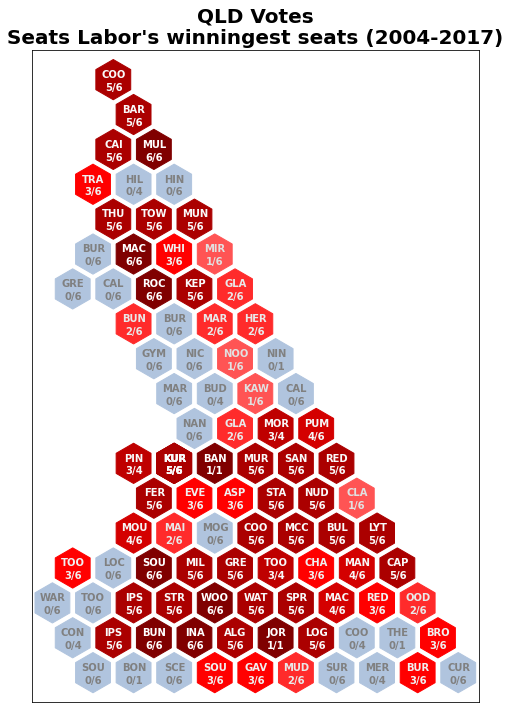

In [813]:
fig, ax = plt.subplots()
plt.title(f"QLD Votes\nSeats Labor's winningest seats (2004-2017)", fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1620, c=freqdf['colorALP'])


for i, point in freqdf.iterrows():
        text1 = f'{point["ALPall"]}/{point["seatsum"]}'
        plt.text(point['x']+0.025, point['y']-0.025, text1, ha="center", va="top", c=point['colortextALP'], weight="bold")
        plt.text(point['x']+0.025, point['y'], point['Seat'][0:3].upper(), ha="center", va="bottom",c=point['colortextALP'], weight="bold")
        
        


plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

In [814]:
def colorScaler(n): 
    
    R = 1 - ((n-1)**2) / 50
    G = 1 - ((n-1)**2) / 450
    B = 0.625 - (n/1.75)
    
    if n < 0.8:
        R = 0.9 +  (n/8)
        G = 0.8 +  (n/4)
        
    else:
        R = 1
        G = 1
        
    B = 0.625 - (n/1.75)

    c = R,G,B
    
    return c

## SEATS THAT CHANGED HANDS IN 2017

In [725]:
swingdf['seat retained'] = np.where(swingdf['winning party 2017'] == swingdf['winning party 2015'],"Y","N")

In [727]:
t = []
for i, point in swingdf.iterrows(): 
    
    x = point['winning party 2017']
    y = point['winning party 2015']
    
    if y ==  '--':
        color = 'lightgray'
                   
    elif x == y:
        color = 'lightgray'
        
    elif x == "ALP":
        color = 'tomato'
        
    elif x == "LNP":
        color = 'deepskyblue'
        
    elif x == "KAP":
        color = 'khaki'
        
    elif x == "GRN":
        color = 'springgreen'
       
    t.append(color)

swingdf['colorSR'] = t

In [728]:
swingdf = swingdf.merge(hex2020, how="left")

([], <a list of 0 Text major ticklabel objects>)

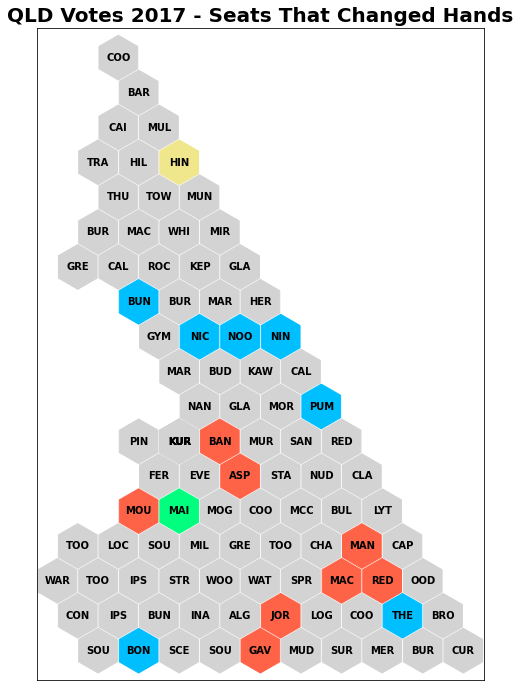

In [730]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Seats That Changed Hands', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSR'], )

for i, point in swingdf.iterrows():                
        #plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y'], point['Seat'][0:3].upper(),ha="center", va="center", weight="bold")
        
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## SWINGS TOWARDS LABOR

In [732]:
t = []

for i, point in swingdf.iterrows():
    
    if point['winning party 2015'] == "--":
        swingALP = '--'
        
    else:
        
        if point['winning party 2017'] == 'ALP':
            now = float(point['winning pc 2017'])
            
        else:
            now = 100.0 - float(point['winning pc 2017'])
                     
        if point['winning party 2015'] == 'ALP':
                then = float(point['winning pc 2015'])
        else:
                then = 100.0 - float(point['winning pc 2015'])
            
        swingALP = round(now - then,2)
                
    t.append(swingALP)

swingdf['swingALP'] = t

In [733]:
r = []

for i in t: 
        
    if i ==  '--':
        color = 'lightgrey'
                   
    elif i == 0:
        color = 'white'
        
    elif i > 8:
        color = 'darkred'
        
    elif i > 4:
        color = 'tomato'
        
    elif i > 0:
        color = 'salmon'
        
    elif i < -8:
        color = 'navy'
        
    elif i < -4:
        color = 'deepskyblue'
        
    elif i < 0:
        color = 'lightsteelblue'
       
    r.append(color)

swingdf['colorSwingALP'] = r

([], <a list of 0 Text major ticklabel objects>)

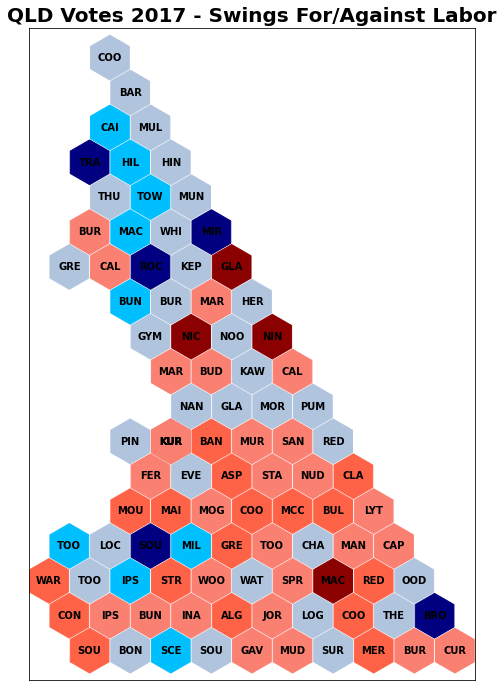

In [735]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Swings For/Against Labor', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSwingALP'], )

for i, point in swingdf.iterrows():                
        #plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y'], point['Seat'][0:3].upper(),ha="center", va="center", weight="bold")
        
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])